# 학습 목표
- 배운 pandas, numpy 함수들을 사용하여 데이터 정제

In [2]:
import numpy as np
import pandas as pd
import os

# 1. 월별급여 데이터 병합

In [3]:
# 현재 dir 위치
print(os.getcwd())

C:\Users\USER\02.python


In [4]:
# 작업 디렉터리 변경
os.chdir("./data")

In [5]:
os.listdir(os.getcwd())

['exam.csv',
 'height_weight.txt',
 'hr-info.csv',
 'hr-pay-info.csv',
 'mpg.csv',
 'org-info.csv',
 'ratings.dat',
 'total_pay_info.csv',
 '시도_성별_경제활동인구_총괄_KOSIS_2022.csv',
 '온도데이터.csv',
 '월별급여',
 '육군신체측정정보.csv',
 '장래_인구변동_KOSIS.csv']

In [6]:
os.listdir('./월별급여')

['hr-pay-info-4월.csv', 'hr-pay-info-5월.csv', 'hr-pay-info-6월.csv']

In [7]:
file_name = os.listdir('./월별급여')

In [8]:
for i in file_name:
    print(i)

hr-pay-info-4월.csv
hr-pay-info-5월.csv
hr-pay-info-6월.csv


In [11]:
# 데이터 프레임이 들어갈 비어있는 리스트
pay_list = []
# 반복문을 통해 데이터 read하고 pay_list에 데이터 append
for i in file_name:
    df = pd.read_csv('./월별급여/'+i, encoding='euc-kr')
    pay_list.append(df)
    display(df.head(2))

,EID,PAYMENT_DY,PAYMENT_DVCD,PAYMENT_AMOUNT
0,E00206,20240401,월급,850
1,E00181,20240401,월급,791


,EID,PAYMENT_DY,PAYMENT_DVCD,PAYMENT_AMOUNT
0,E00206,20240501,월급,850
1,E00181,20240501,월급,791


,EID,PAYMENT_DY,PAYMENT_DVCD,PAYMENT_AMOUNT
0,E00206,20240601,월급,850
1,E00181,20240601,월급,791


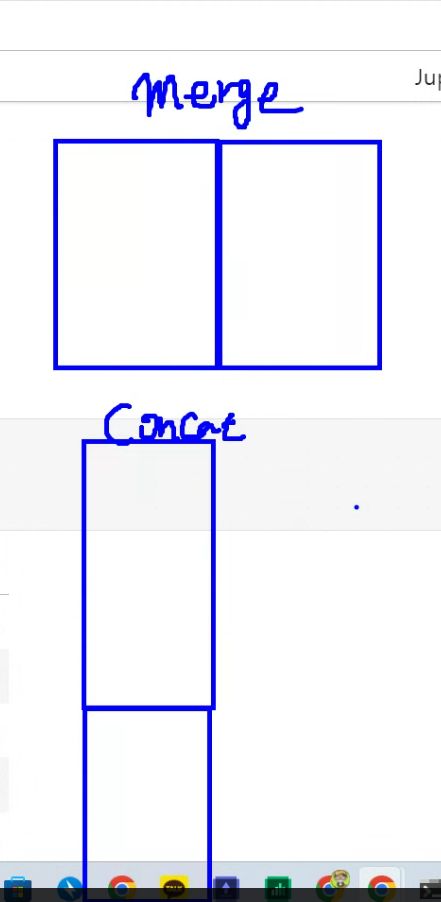

In [12]:
# 데이터 병합
total_pay = pd.concat(pay_list)
total_pay

,EID,PAYMENT_DY,PAYMENT_DVCD,PAYMENT_AMOUNT
0,E00206,20240401,월급,850
1,E00181,20240401,월급,791
2,E00164,20240401,월급,758
3,E00190,20240401,월급,708
4,E00209,20240401,월급,716
...,...,...,...,...
146,E00322,20240601,월급,375
147,E00389,20240601,월급,375
148,E00438,20240601,월급,375
149,E00304,20240601,월급,375


In [13]:
#csv 파일로 저장
#.to_csv('파일명')
total_pay.to_csv('./total_pay.csv', index = False)

# org_info 조직별 인원수, 나이, 근무년수, 평균연봉

In [16]:
org_info = pd.read_csv('./org-info.csv', encoding = 'euc-kr', index_col = 'ORG_CD')
org_info.head(2)

,ENG_DIVISION,KOR_DIVISION,ENG_DEPARTMENT,KOR_DEPARTMENT,Team,KOR_TEAM,Role
ORG_CD,,,,,,,
ORG001,Home Entertainment Division,HE사업본부,TV Business Operations Department,TV사업운영센터,TV Product Management Team,TV 제품 관리 팀,관리 및 마케팅 전략 수립을 통해 TV 제품의 전체 라이프사이클을 관리합니다.
ORG002,Home Entertainment Division,HE사업본부,TV Business Operations Department,TV사업운영센터,TV Marketing Team,TV 마케팅 팀,"TV 제품의 시장 진입 전략을 수립하고, 광고 및 프로모션 활동을 기획합니다."


In [17]:
org_info.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, ORG001 to ORG030
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ENG_DIVISION    30 non-null     object
 1   KOR_DIVISION    30 non-null     object
 2   ENG_DEPARTMENT  30 non-null     object
 3   KOR_DEPARTMENT  30 non-null     object
 4   Team            30 non-null     object
 5   KOR_TEAM        30 non-null     object
 6   Role            30 non-null     object
dtypes: object(7)
memory usage: 1.9+ KB


In [18]:
hr_info = pd.read_csv("./hr-info.csv", encoding= "euc-kr")
hr_info.head(2)

,EID,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION
0,E00206,시이오,M,NaN,P001,49,25,박사 학위,4.5,10200,2024-03-01,240,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,KOREA,Y
1,E00181,나사장,F,NaN,P002,49,24,박사 학위,4.6,9500,2024-03-01,236,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y


In [20]:
hr_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EID                 200 non-null    object 
 1   ENAME               200 non-null    object 
 2   GENDER              200 non-null    object 
 3   ORG_CD              197 non-null    object 
 4   POS_CD              200 non-null    object 
 5   AGE                 200 non-null    int64  
 6   SERVICE_YEAR        200 non-null    int64  
 7   EDU_LEVEL           200 non-null    object 
 8   PERFORMANCE_SCORE   200 non-null    float64
 9   SALARY              200 non-null    int64  
 10  LAST_PROMO_DT       182 non-null    object 
 11  TRAINING_HOURS      200 non-null    int64  
 12  SKILLS              200 non-null    object 
 13  ACTIVE_STATE        200 non-null    object 
 14  HIRE_DATE           200 non-null    object 
 15  RETIRE_DATE         49 non-null     object 
 16  RETIRE_R

In [26]:
hr_org_info = hr_info.groupby(['ORG_CD']).agg({"ENAME":'count',"AGE":'mean','SERVICE_YEAR':"mean","SALARY":"mean"})

In [28]:
# org_info + hr_info 데이터 결합
# index를 기준으로 가로로 병합 - concat
# * 주의사항 : 각각의 df들의 인덱스명은 같아야지 병합 가능
org_hr_concat = pd.concat([org_info, hr_org_info], axis = 1)
org_hr_concat.head(2)

,ENG_DIVISION,KOR_DIVISION,ENG_DEPARTMENT,KOR_DEPARTMENT,Team,KOR_TEAM,Role,ENAME,AGE,SERVICE_YEAR,SALARY
ORG_CD,,,,,,,,,,,
ORG001,Home Entertainment Division,HE사업본부,TV Business Operations Department,TV사업운영센터,TV Product Management Team,TV 제품 관리 팀,관리 및 마케팅 전략 수립을 통해 TV 제품의 전체 라이프사이클을 관리합니다.,6,26.166667,0.333333,5033.333333
ORG002,Home Entertainment Division,HE사업본부,TV Business Operations Department,TV사업운영센터,TV Marketing Team,TV 마케팅 팀,"TV 제품의 시장 진입 전략을 수립하고, 광고 및 프로모션 활동을 기획합니다.",4,34.000000,7.500000,6550.000000


In [29]:
# 급여 데이터
hr_pay_info = pd.read_csv("./hr-pay-info.csv", encoding = 'euc-kr')
hr_pay_info

,EID,PAYMENT_DY,PAYMENT_DVCD,PAYMENT_AMOUNT
0,E00206,20240601,월급,850
1,E00181,20240601,월급,791
2,E00164,20240601,월급,758
3,E00190,20240601,월급,708
4,E00209,20240601,월급,716
...,...,...,...,...
750,E00322,20240401,상여금,300
751,E00389,20240401,상여금,300
752,E00438,20240401,상여금,300
753,E00304,20240401,상여금,300


In [32]:
hr_info_df = hr_info[['EID','ENAME','GENDER']]
hr_info_df

,EID,ENAME,GENDER
0,E00206,시이오,M
1,E00181,나사장,F
2,E00164,난부사장,M
3,E00190,판라다,F
4,E00209,누훈봉,M
...,...,...,...
195,E00322,부탐회,F
196,E00389,초두반,F
197,E00438,권개득,M
198,E00304,탐출조,M


In [35]:
salary_df1 = pd.merge(hr_info_df, hr_pay_info, on = 'EID')
salary_df1

,EID,ENAME,GENDER,PAYMENT_DY,PAYMENT_DVCD,PAYMENT_AMOUNT
0,E00206,시이오,M,20240601,월급,850
1,E00206,시이오,M,20240501,월급,850
2,E00206,시이오,M,20240401,월급,850
3,E00206,시이오,M,20240401,성과급,425
4,E00206,시이오,M,20240401,상여금,300
...,...,...,...,...,...,...
750,E00428,을충나,F,20240601,월급,375
751,E00428,을충나,F,20240501,월급,375
752,E00428,을충나,F,20240401,월급,375
753,E00428,을충나,F,20240401,성과급,188
